In [1]:
%pylab inline
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
main = '/home/golos/Main/Simulations/Patterns/withP_forTend_pC/Cand_X/'
Ims = Td.initParcellation(Te.Pdir('Regions/Images/'))
pars = Te.findParameters(main)
NP = len(pars['P'])

In [3]:
AllPatts, AllTends = [], []
for P in pars['P']:
    endAd = '_P_%.2f_G_%.2f.npy' %(P, pars['G'][0])
    pattAd = main + 'patterns' + endAd
    tendAd = main + 'tendances' + endAd
    
    AllPatts.append(Te.data2array(pattAd)[:40])
    AllTends.append(Te.data2array(tendAd))

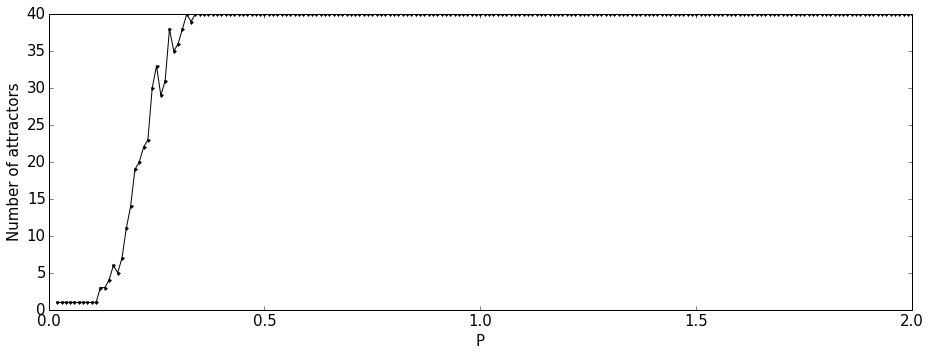

In [4]:
lens = []
for ip in range(NP):
    lens.append(len(AllPatts[ip]))

figure(figsize=(13,5))
plot(pars['P'], lens, '.-k')
xlabel('P', fontsize=15)
ylabel('Number of attractors', fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)
tight_layout()
show()

In [ ]:
Td.tic()
freqAssoc, PvalAssoc, IvalAssoc = Tf.winClus2StackHist(AllPatts, AllTends, 
                                                       sim_coef=0.91, sim_func=Tf.similAndPear, rnorm=3300., miea='max')
Td.tac()
print 'Number of Patterns:', len(freqAssoc)

In [10]:
m = 5
color = rand(m,3)
color[:8*(8<=m) or m] = \
[array([ 0.14023211,  0.40195332,  0.64536527]),
 array([ 0.86350853,  0.75486948,  0.15486282]),
 array([ 0.4539819 ,  0.67874925,  0.46151467]),
 array([ 0.64248704,  0.2037464 ,  0.14189158]),
 array([ 0.94450304,  0.96334447,  0.94727408]),
 array([ 0.2157692 ,  0.26042416,  0.40507897]),
 array([ 0.11919213,  0.41765824,  0.25492983]),
 array([ 0.43274338,  0.38025467,  0.11939785])][:8*(8<=m) or m]

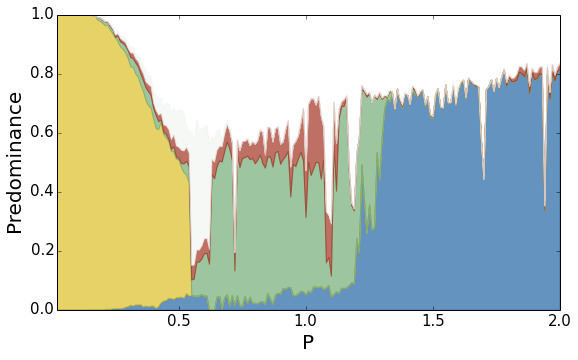

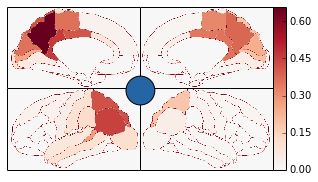

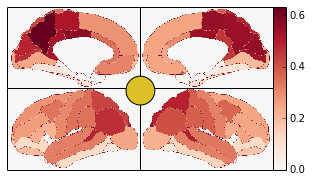

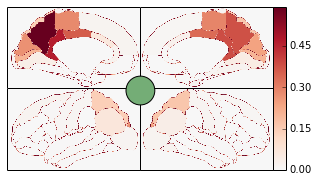

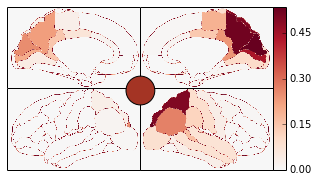

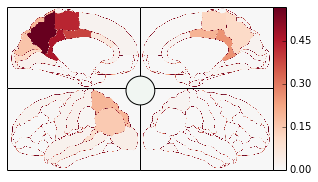

In [11]:
Td.histoParcel(lY=freqAssoc, lX=PvalAssoc, X=pars['P'], iA=IvalAssoc, AP=AllPatts, AT=AllTends, 
            order=1, m=m, maxs=None, gauss=None, tend=0, color=color, figsize=(5,4))
            #order=1, m=-1, maxs=(0.,.5), gauss=(70,20), tend=1)